In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
#-*- coding: utf-8 -*-
plt.rcParams['font.sans-serif']=['SimHei'] #解决中文乱码
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [42]:
# 中文乱码
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='/Library/Fonts/Songti.ttc', size=6)
# fontproperties=font

In [19]:
from matplotlib.font_manager import _rebuild
_rebuild() #reload一下

In [21]:
import pickle
colorMap = pickle.load(open('colorMap.pkl', 'rb'))

In [23]:
sizeMap = {
    '个人工具': 0.02,
 '亲子服务': 0.3,
 '便捷生活': 5.68,
 '健康医疗': 1.58,
 '办公管理': 0.08,
 '实用工具': 11.03,
 '拍摄美化': 0.02,
 '旅行预订': 0.64,
 '汽车服务': 0.16,
 '游戏服务': 2.54,
 '电子商务': 3.26,
 '电子阅读': 0.28,
 '社交网络': 2.38,
 '综合资讯': 7.63,
 '美食外卖': 6.93,
 '视频服务': 12.45,
 '通讯聊天': 39.63,
 '金融理财': 4.31,
 '音乐音频': 1.06
}

In [33]:
labels = ['通讯聊天', '拍摄美化','电子商务','汽车服务','视频服务','亲子服务','实用工具','健康医疗','美食外卖','电子阅读',
         '社交网络','游戏服务','办公管理','便捷生活','音乐音频','金融理财','个人工具','综合资讯','旅行预订']
sizes = []
colors = []
for label in labels:
    sizes.append(sizeMap[label])    
    colors.append(colorMap[label])

In [34]:
len(set(labels))

19

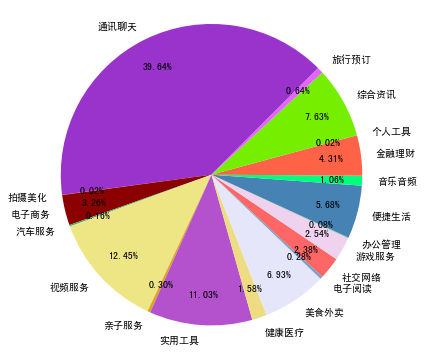

In [50]:
plt.figure(figsize=(6,6)) #调节图形大小
# labels = [u'大型',u'中型',u'小型',u'微型'] #定义标签
# sizes = [46,253,321,66] #每块值
# colors = ['red','yellowgreen','lightskyblue','yellow'] #每块颜色定义
explode = (0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
#                       explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =45, #逆时针起始角度设置
                      pctdistance = 0.8,
                      textprops = {'fontsize':10}) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.savefig('output/App饼图.jpg', dpi=400)
plt.show()
!open output/App饼图.jpg

In [5]:
try:
    import findspark
except:
    os.system('pip install findspark')
    import findspark
findspark.init()
from pyspark import *
from pyspark import SparkContext

In [9]:
sc = SparkContext.getOrCreate()
usage_file = '../resources/data0117'
usage_rdd = sc.textFile(usage_file).map(lambda x: x.split("|"))
usage_rdd = usage_rdd.filter(lambda x: x[2] != '柚宝宝孕育')
#print(usage_rdd.take(5))
print(usage_rdd.count())

949908


In [34]:
usage_rdd = usage_rdd.map(lambda x: x[:-1] + [int(x[-1])])
usage_rdd.take(5)

[['C966BB7B4BB196602D1054B27E6F9BAE', '10', 'QQ', '通讯聊天', 15],
 ['C2827EBF2B61C4FB71C164F3D13BE312', '08', '微信', '通讯聊天', 1],
 ['F819FE792867382C9C8BD39BA7837746', '21', 'QQ', '通讯聊天', 4],
 ['DA549AD85F2DD7E87126416CCA4C44B4', '18', '微信', '通讯聊天', 3],
 ['F81A9E1BCC2FF6820539952284E9C7A9', '12', '开心消消乐', '游戏服务', 1]]

In [93]:
data = pd.DataFrame(usage_rdd.collect(), columns=['id','hour','app','cat','times'])

In [91]:
DAU = usage_rdd.map(lambda x: (x[0], x[2])).distinct()
DAU = pd.DataFrame(DAU.collect(), columns=['id','app'])
DAU = DAU.groupby('app')['id'].count().sort_values(ascending=False)[:20]

In [97]:
traffic = data.groupby('app')['times'].sum()
traffic = traffic[DAU.index]

In [95]:
DAU

app
微信       24957
百度搜索     20362
QQ       18270
开心消消乐    17353
腾讯视频     16992
支付宝      15475
大众点评网    13903
Keep     11553
搜狗输入法     6855
新浪微博      5939
百度地图      5566
今日头条      5343
高德地图      4483
爱奇艺       4336
京东商城      3732
墨迹天气      2163
酷狗音乐      1686
网易新闻      1546
网易云音乐     1350
百度云       1301
Name: id, dtype: int64

In [98]:
traffic

app
微信       5310192
百度搜索     1429781
QQ        474632
开心消消乐     333397
腾讯视频     1327045
支付宝       626307
大众点评网     990601
Keep      210241
搜狗输入法     179878
新浪微博      310588
百度地图      307250
今日头条      881974
高德地图      437395
爱奇艺       489737
京东商城      378802
墨迹天气       69124
酷狗音乐       89691
网易新闻      231794
网易云音乐      64698
百度云        11186
Name: times, dtype: int64

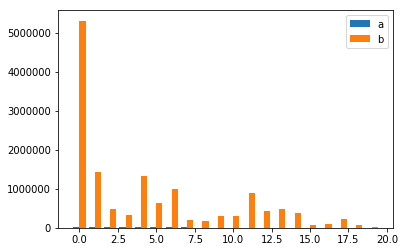

In [99]:
import numpy as np
import matplotlib.pyplot as plt

size = 20
x = np.arange(size)
a = np.array(DAU.values)
b = np.array(traffic.values)

total_width, n = 0.8, 2
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='a')
plt.bar(x + width, b, width=width, label='b')
plt.legend()
plt.show()

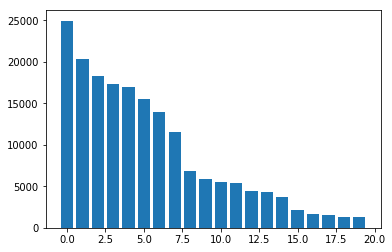

In [89]:
data = DAU.values[::-1]
plt.bar(range(len(data)), data)
plt.show()

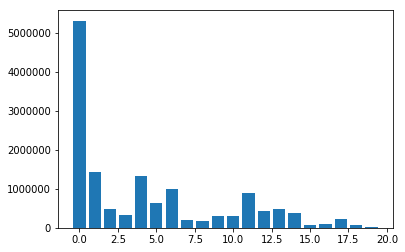

In [90]:
data = traffic.values[::-1]
plt.bar(range(len(data)), data)
plt.show()

In [103]:
from matplotlib.font_manager import _rebuild
_rebuild() #reload一下

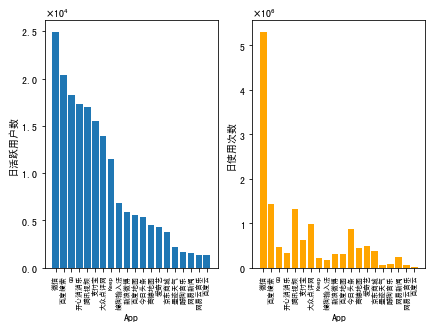

In [131]:
plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.2, hspace =0)#调整子图间距
ax1.set_xlabel('App')
ax1.set_ylabel('日活跃用户数')
ax1.set_xticks(list(range(20)))
ax1.set_xticklabels(list(DAU.index), rotation='vertical', fontsize='x-small')
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax1.yaxis.set_major_formatter(formatter) 

ax2.set_xlabel('App')
ax2.set_ylabel('日使用次数')
ax2.set_xticks(list(range(20)))
ax2.set_xticklabels(list(DAU.index), rotation='vertical', fontsize='x-small') 
ax2.yaxis.set_major_formatter(formatter) 

ax1.bar(list(range(20)), DAU.values)
ax2.bar(list(range(20)), traffic.values, color='orange')
plt.savefig('./output/DAU.png',dpi=400, bbox_inches='tight')
plt.show()
!open output/DAU.png